In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
import scipy.spatial.distance as ssd
import seaborn as sns
from sklearn.manifold import MDS

In [2]:
import sys
sys.path.append("..")
sys.path.append("../src")
import utils

In [10]:
# Here I'm using that I partially decoupled read/load ops from the .env file
params = utils.read_parameter_file_from_path("/Users/c/gits/TEQUAL/experiments/MNIST-compression/params.yaml")
params.experiment

'MNIST-compression'

In [11]:
unnormalized_distances = utils.load_distance_matrix_for_experiment(params, "landscape", "unnormalized")
normalized_distances = utils.load_distance_matrix_for_experiment(params, "landscape", "normalized")

In [17]:
distMatrix = normalized_distances

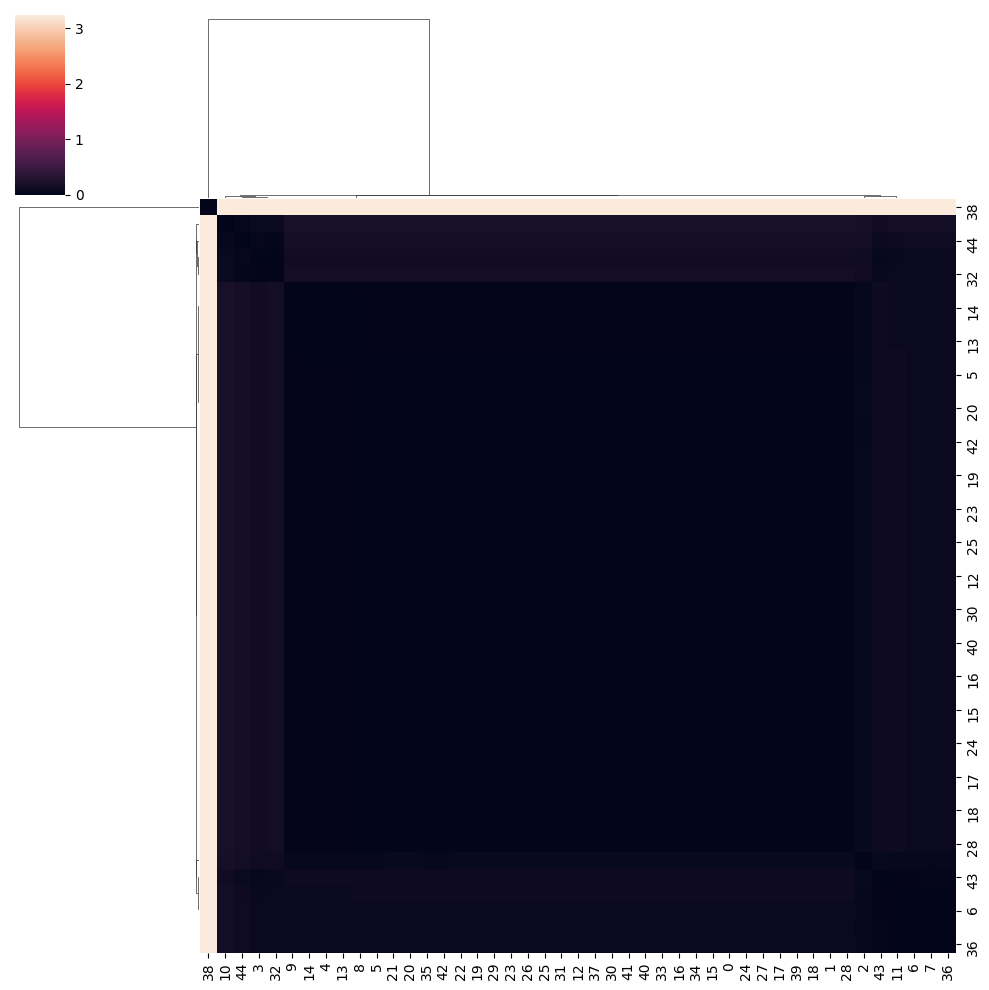

In [18]:
distArray = ssd.squareform(distMatrix) 
distLinkage = hierarchy.linkage(distArray)
sns.clustermap(distMatrix, row_linkage=distLinkage, col_linkage=distLinkage, xticklabels=1, vmin=0)

<Axes: >

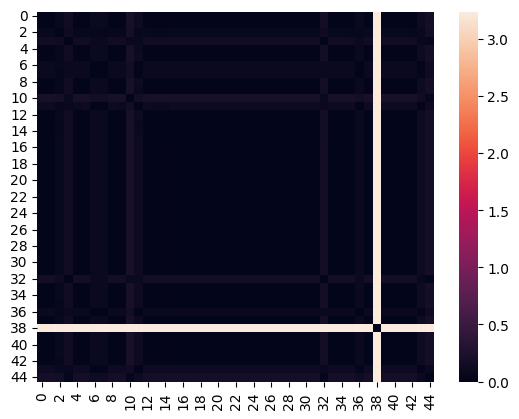

In [19]:
sns.heatmap(distMatrix, robust=True)

In [20]:
unnormalized = distMatrix
zscore_standardized = (distMatrix - distMatrix.mean()) / distMatrix.std()
minmax_normalized = (distMatrix - distMatrix.min()) / (distMatrix.max() - distMatrix.min())

/Users/c/gits/TEQUAL/venv/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


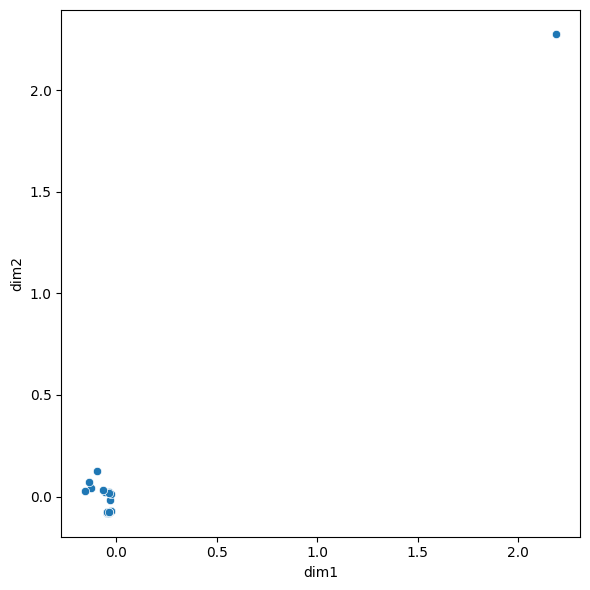

In [21]:
mds = MDS(metric=True, dissimilarity="precomputed").fit_transform(distMatrix)
fig, ax = plt.subplots(1,1,figsize=(6,6))
sns.scatterplot(pd.DataFrame(mds, columns=["dim1","dim2"]), x="dim1", y="dim2", ax=ax)
plt.tight_layout()